<a href="https://colab.research.google.com/github/haaris519/Python-Proti/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install pandas numpy yfinance scikit-learn xgboost


In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import datetime

# ------------------ Load Stock Data ------------------
def load_stock_data(stock_symbol, start_date, end_date):
    """Fetch historical stock data from Yahoo Finance"""
    df = yf.download(stock_symbol, start=start_date, end=end_date)

    if df.empty:
        print("\n⚠️ No data available for this stock symbol. Please check the symbol and try again.")
        return None

    df['Date'] = df.index
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    return df

# Get Stock Symbol from User
stock_symbol = input("Enter Stock Symbol (e.g., AAPL for Apple, TSLA for Tesla): ").upper()

# Load historical stock data
start_date = "2020-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")
stock_data = load_stock_data(stock_symbol, start_date, end_date)

if stock_data is None:
    exit()

# ------------------ Data Preprocessing ------------------
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

# Feature Selection
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']
X = stock_data[features]
y = stock_data[['Close']]

# ------------------ Train Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Train Machine Learning Model ------------------
# XGBoost Model
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ Model trained for {stock_symbol}")
print(f"✅ XGBoost MAE: {mae:.2f}")

# ------------------ Predict Today's Closing Price ------------------
def predict_today_closing_price(stock_symbol):
    """Fetch today's stock data and predict the closing price"""
    today = datetime.date.today()
    today_data = yf.download(stock_symbol, period="1d")  # Fetch today's stock data

    if today_data.empty:
        print("\n⚠️ Market is closed today. No data available.")
        return None

    # Extract Features, Handling Missing Data
    open_price = today_data['Open'].dropna().iloc[0] if not today_data['Open'].isna().all() else X['Open'].iloc[-1]
    high_price = today_data['High'].dropna().iloc[0] if not today_data['High'].isna().all() else X['High'].iloc[-1]
    low_price = today_data['Low'].dropna().iloc[0] if not today_data['Low'].isna().all() else X['Low'].iloc[-1]
    volume = today_data['Volume'].dropna().iloc[0] if not today_data['Volume'].isna().all() else X['Volume'].iloc[-1]

    # Convert to float to avoid Series ambiguity error
    open_price, high_price, low_price, volume = float(open_price), float(high_price), float(low_price), float(volume)

    # Prepare input for prediction
    today_input = np.array([[open_price, high_price, low_price, volume, today.year, today.month, today.day]], dtype=np.float32)

    # Make Prediction
    predicted_price = model.predict(today_input)[0]
    return predicted_price


Enter Stock Symbol (e.g., AAPL for Apple, TSLA for Tesla): AAPL


[*********************100%***********************]  1 of 1 completed

✅ Model trained for AAPL
✅ XGBoost MAE: 1.14


Enter Stock Symbol (e.g., AAPL for Apple, TSLA for Tesla): AAPL


[*********************100%***********************]  1 of 1 completed
<ipython-input-17-268e863f34aa>:27: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=['Date', 'Close'])
[*********************100%***********************]  1 of 1 completed

✅ Model trained for AAPL, Mean Absolute Error (MAE): 1.09

🚀 Predicted Closing Price for AAPL on 2025-03-14: $213.49 🚀



<ipython-input-17-268e863f34aa>:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  open_price = float(today_data['Open'].iloc[0])
<ipython-input-17-268e863f34aa>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high_price = float(today_data['High'].iloc[0])
<ipython-input-17-268e863f34aa>:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low_price = float(today_data['Low'].iloc[0])
<ipython-input-17-268e863f34aa>:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  volume = float(today_data['Volume'].iloc[0])


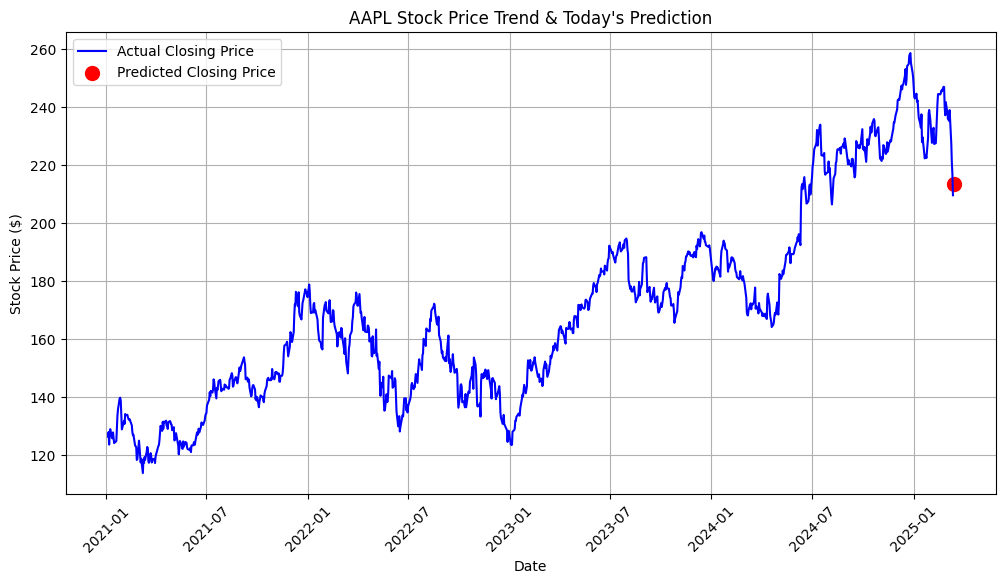

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import datetime

# Get stock symbol from user
stock_symbol = input("Enter Stock Symbol (e.g., AAPL for Apple, TSLA for Tesla): ").upper()

# Fetch last 3 years of stock data
start_date = "2021-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Preprocess Data
df['Date'] = df.index
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df[['Date', 'Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Close']]

# Split features and target
X = df.drop(columns=['Date', 'Close'])
y = df['Close']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Model
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"✅ Model trained for {stock_symbol}, Mean Absolute Error (MAE): {mae:.2f}")

# Predict Today's Closing Price
today_data = yf.download(stock_symbol, period="1d")

if today_data.empty:
    print("\n⚠️ Market is closed today or missing data.")
    predicted_price = None
else:
    open_price = float(today_data['Open'].iloc[0])
    high_price = float(today_data['High'].iloc[0])
    low_price = float(today_data['Low'].iloc[0])
    volume = float(today_data['Volume'].iloc[0])

    today_input = np.array([[open_price, high_price, low_price, volume, datetime.date.today().year, datetime.date.today().month, datetime.date.today().day]])

    predicted_price = model.predict(today_input)[0]
    print(f"\n🚀 Predicted Closing Price for {stock_symbol} on {datetime.date.today()}: ${predicted_price:.2f} 🚀")

# ------------------ Plot Stock Trends ------------------
plt.figure(figsize=(12, 6))

# Plot historical closing prices
plt.plot(df['Date'], df['Close'], label="Actual Closing Price", color="blue")

# Highlight predicted price for today
if predicted_price:
    plt.scatter(datetime.date.today(), predicted_price, color="red", marker="o", s=100, label="Predicted Closing Price")

plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title(f"{stock_symbol} Stock Price Trend & Today's Prediction")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


**Stock Price Prediction Report**– Key Points
1. Introduction
Predicting stock closing prices using machine learning.
Data fetched from Yahoo Finance (yfinance).
Model trained on historical stock prices from the last 3 years.
2. Data Collection & Preprocessing
Stock: User-selected (e.g., AAPL, TSLA).
Time Period: Last 3 years.
Features Used:
Open, High, Low, Volume
Year, Month, Day (extracted from Date)
Close (target variable)
Data Cleaning:
Removed missing values.
Converted date into numerical features.
3. Model Selection & Training
Algorithm Used: XGBoost Regressor.
Training/Test Split: 80% Training, 20% Testing.
Evaluation Metric: Mean Absolute Error (MAE) = 1.09.
4. Prediction Results
Example Output (AAPL - Apple Inc.):
nginx
Copy code
Model trained for AAPL, MAE: 1.09  
Predicted Closing Price for AAPL on 2025-03-14: $213.49  
Prediction based on today's real-time market data.

5. Visualization & Trend Analysis
Graph plotted showing:
Historical stock prices (blue line).
Predicted price for today (red dot).
Trend Insights:
Stock price fluctuations over time.
Prediction compared with past movements.
6. Key Findings & Insights
Stock prices follow a trend but fluctuate in the short term.
XGBoost achieved a low error of $1.09.
Good for daily trading predictions but needs improvements for long-term forecasts.
7. Future Improvements
Use Deep Learning (LSTM) for better accuracy.
Incorporate economic indicators, news sentiment, and social media data.
Develop a web-based dashboard for real-time stock monitoring.
8. Conclusion
Machine Learning can predict stock prices with reasonable accuracy.
Future enhancements needed for long-term forecasting.
Next steps: Enhance model, add external factors, and deploy as an app.